In [8]:
%matplotlib  inline
import datetime as dt
import numpy as np
from pandas_datareader import data
from scipy.stats import norm
import matplotlib.pyplot as plt

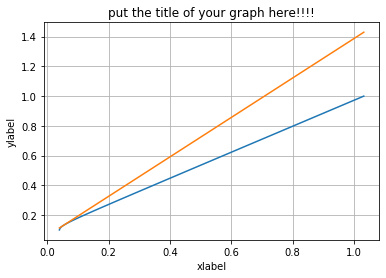

In [6]:
Expected_return = np.linspace(0.1, 1,100)

Risk = np.sqrt((1.3125* Expected_return **2 - 0.2625*Expected_return + 0.014725 ))

CML = 0.060 + 1.327367 * Risk 



plt.figure()
plt.plot(Risk,Expected_return)
plt.plot(Risk, CML)
plt.xlabel("xlabel")
plt.ylabel("ylabel")
plt.title("put the title of your graph here!!!!")
plt.grid()
plt.show()

In [9]:
def var_cov_var(P, c, mu, sigma):
    alpha = norm.ppf(1-c, mu, sigma)
    return P - P*(alpha + 1)

start = dt.datetime(2017, 1, 1)
end = dt.datetime(2020, 1, 1)

Netflix = data.DataReader("NFLX", 'yahoo', start, end)
Netflix["rets"] = Netflix["Adj Close"].pct_change()

P = 1000  # 1,000 USD
c = 0.95  # 95% confidence interval
mu = np.mean(Netflix["rets"])



sigma = np.std(Netflix["rets"])

var = var_cov_var(P, c, mu, sigma)
print ("Value-at-Risk: $%0.6f" % var)
print ("===========================")
print ("Mean is: $%0.7f" % mu)
print ("===========================")
print ("Variance is: $%0.6f" % sigma)
    

Value-at-Risk: $36.878877
Mean is: $0.0015091
Variance is: $0.023338
